In [22]:
import numpy as np
import pandas as pd



In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kunalgp/top-1000-most-played-spotify-songs-of-all-time")

print("Path to dataset files:", path)

Path to dataset files: /Users/muskangupta/.cache/kagglehub/datasets/kunalgp/top-1000-most-played-spotify-songs-of-all-time/versions/1


In [24]:
data = pd.read_csv("/Users/muskangupta/.cache/kagglehub/datasets/kunalgp/top-1000-most-played-spotify-songs-of-all-time/versions/1/spotify_top_1000_tracks.csv")
data.head()

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    1000 non-null   object 
 1   artist        1000 non-null   object 
 2   album         1000 non-null   object 
 3   release_date  1000 non-null   object 
 4   popularity    1000 non-null   int64  
 5   spotify_url   1000 non-null   object 
 6   id            1000 non-null   object 
 7   duration_min  1000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [26]:
data.isna().sum()
#isna().sum() gives the number of missing values in each column


track_name      0
artist          0
album           0
release_date    0
popularity      0
spotify_url     0
id              0
duration_min    0
dtype: int64

In [27]:
data.shape


(1000, 8)

In [28]:
#preprocessing
data['release_date'] = pd.to_datetime(data['release_date'] , errors = 'coerce')
data['year'] = data['release_date'].dt.year
data['month'] = data['release_date'].dt.month
data['day'] = data['release_date'].dt.day
data.head()

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min,year,month,day
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767,2018.0,2.0,9.0
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883,2016.0,11.0,25.0
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667,2019.0,6.0,21.0
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083,2020.0,8.0,7.0
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433,2016.0,8.0,5.0


In [29]:
missing_values = data[['release_date' , 'year']].isnull().sum()
print(missing_values)

release_date    23
year            23
dtype: int64


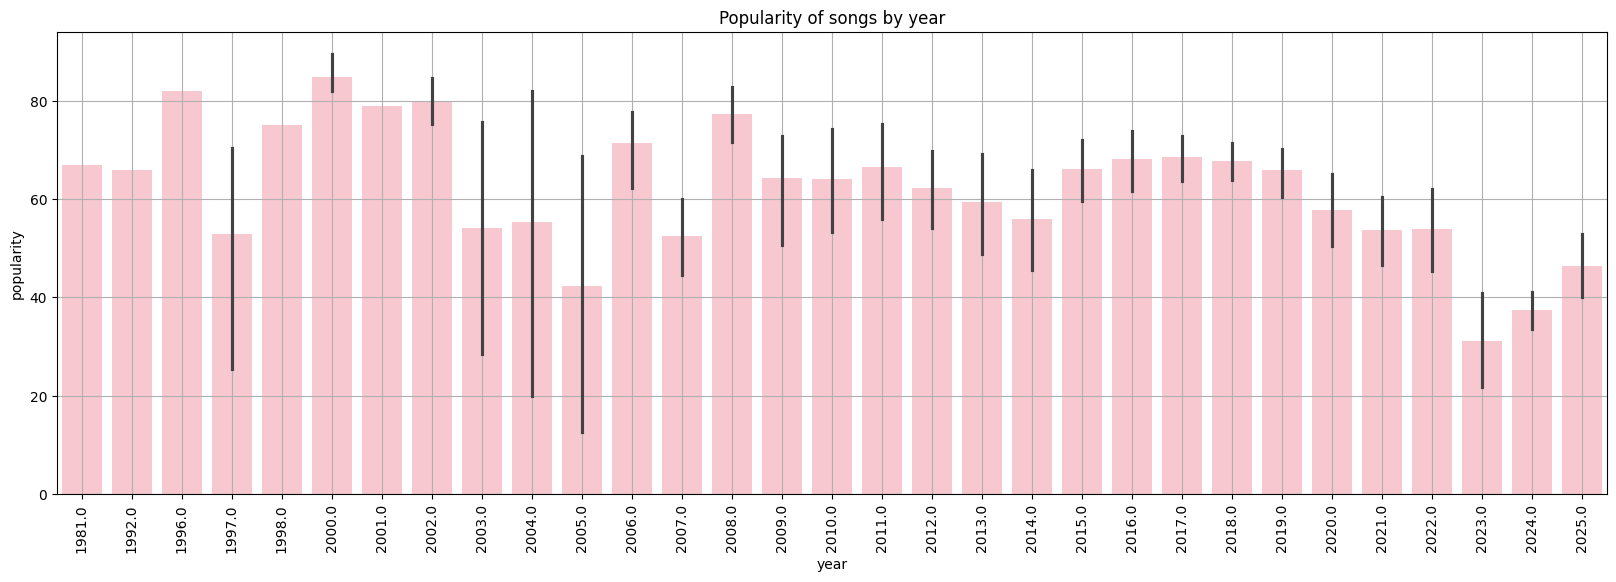

In [30]:
#EDA 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,6))
sns.barplot(x = 'year' , y = 'popularity' , color = 'pink', data = data)
plt.title('Popularity of songs by year')
plt.xticks(rotation = 90)#rotating the x axis labels
plt.grid()
plt.show()

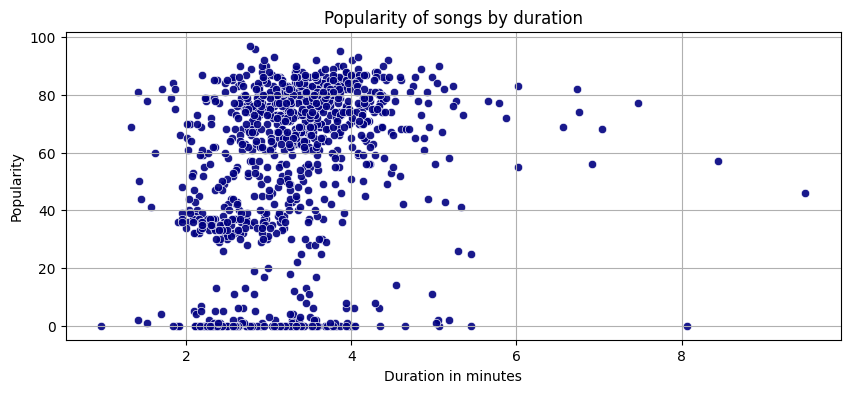

In [31]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'duration_min' , y ='popularity' , color = 'navy' , alpha = 0.9 , data = data)
#alpha is used to set the transparency(darkness and lightness of color) of the points
plt.title('Popularity of songs by duration')
plt.xlabel('Duration in minutes')
plt.ylabel('Popularity')
plt.grid()
plt.show()

In [32]:
top_artists = data['artist'].value_counts().nlargest(10)
#this will give the top 10 artists with the most number of songs in the dataset
top_artists

artist
The Weeknd       26
Taylor Swift     25
Avril Lavigne    21
Alan Walker      14
Ariana Grande    12
Selena Gomez     12
Ed Sheeran       11
Justin Bieber    11
Katy Perry        9
Badscandal        9
Name: count, dtype: int64

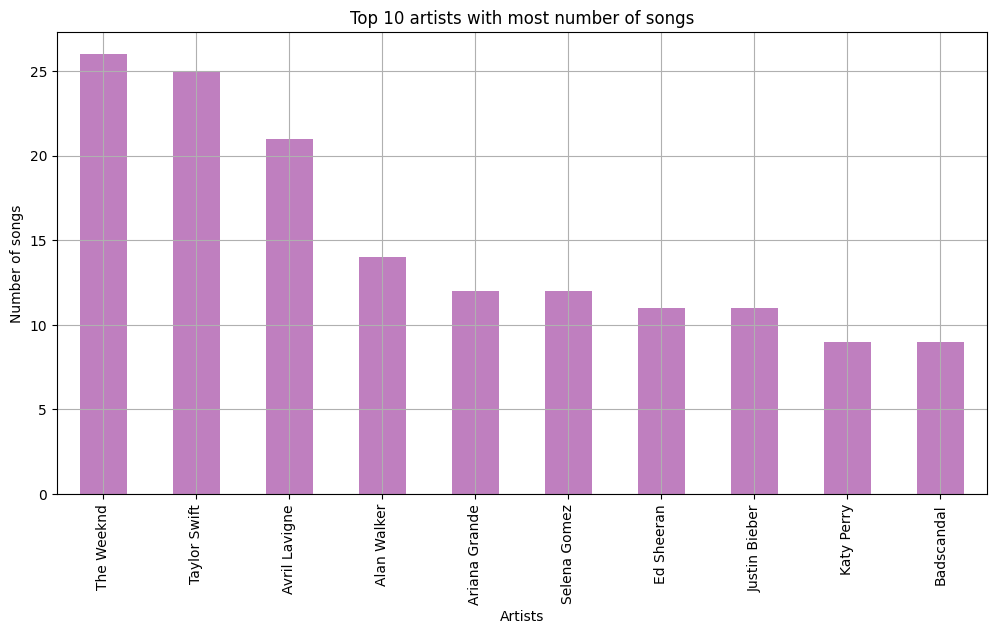

In [33]:
plt.figure(figsize = (12,6))
top_artists.plot(kind = 'bar' , color = 'purple' , alpha = 0.5)
plt.title('Top 10 artists with most number of songs')
plt.xlabel('Artists')
plt.ylabel('Number of songs')
plt.grid()
plt.show()

In [34]:
top_albums = data['album'].value_counts().nlargest(10)
top_albums

album
The Best Damn Thing (Expanded Edition)    17
Different World                            7
Speak Your Mind (Deluxe)                   6
Starboy                                    6
Dangerous Woman                            5
Lover                                      5
÷ (Deluxe)                                 5
Dawn FM                                    4
Make You Mine                              4
Aquarium (Special Edition)                 4
Name: count, dtype: int64

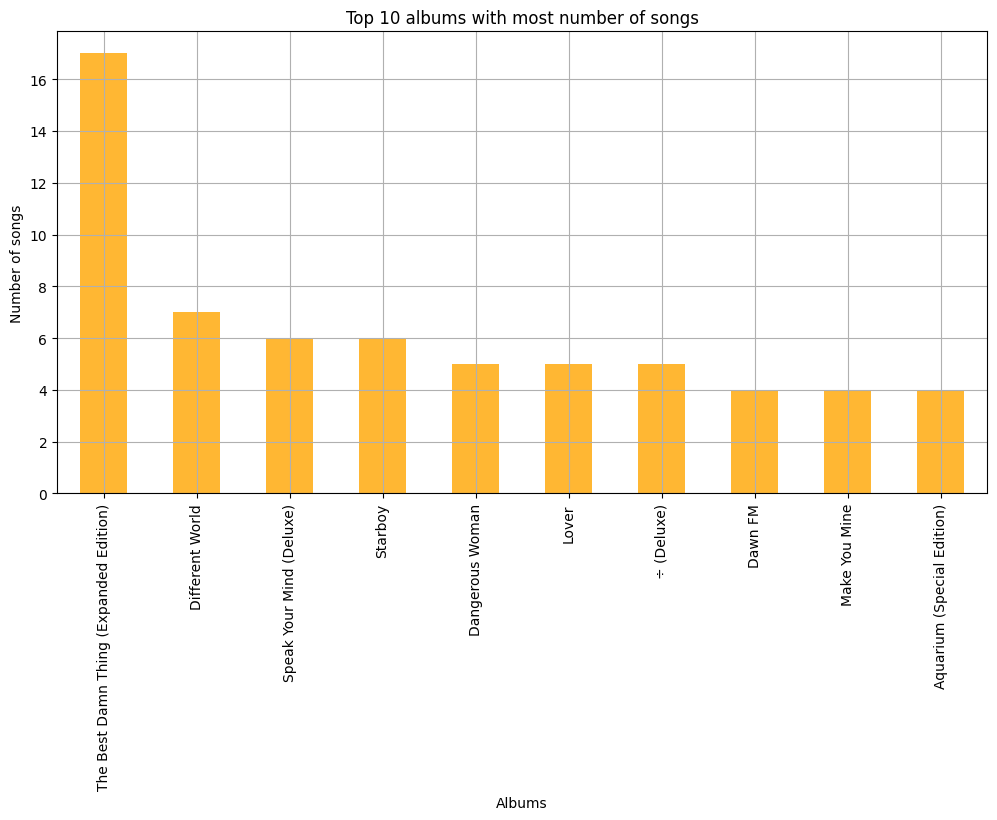

In [35]:
plt.figure(figsize=(12,6))
top_albums.plot(kind = 'bar' , color = 'orange' , alpha = 0.8)
plt.xticks(rotation = 90)
plt.title('Top 10 albums with most number of songs')
plt.xlabel('Albums')
plt.ylabel('Number of songs')
plt.grid()
plt.show()

array([[<Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'duration_min'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>]], dtype=object)

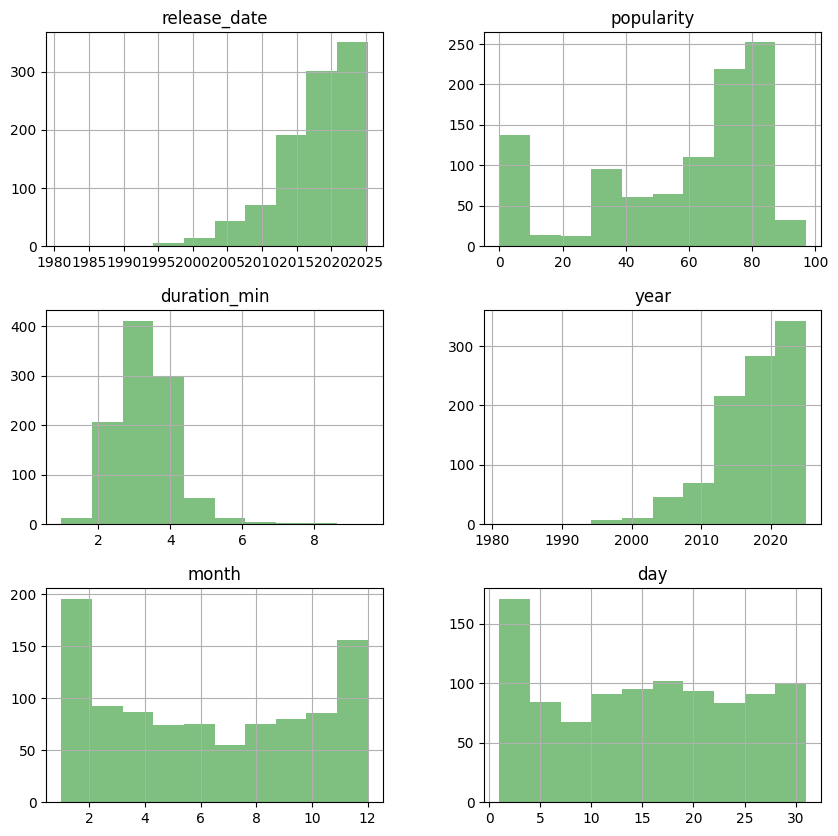

In [36]:
data.hist(color = 'green' , alpha = 0.5 , figsize = (10,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x12e056e90>,
 'caps': [<matplotlib.lines.Line2D at 0x12e057110>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e056d50>],
 'medians': [<matplotlib.lines.Line2D at 0x12e057390>],
 'fliers': [<matplotlib.lines.Line2D at 0x12e0574d0>],
 'means': []}

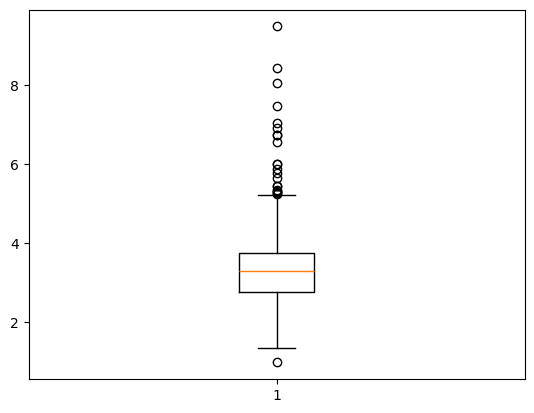

In [37]:
plt.boxplot(data['duration_min'])

<Axes: xlabel='album', ylabel='count'>

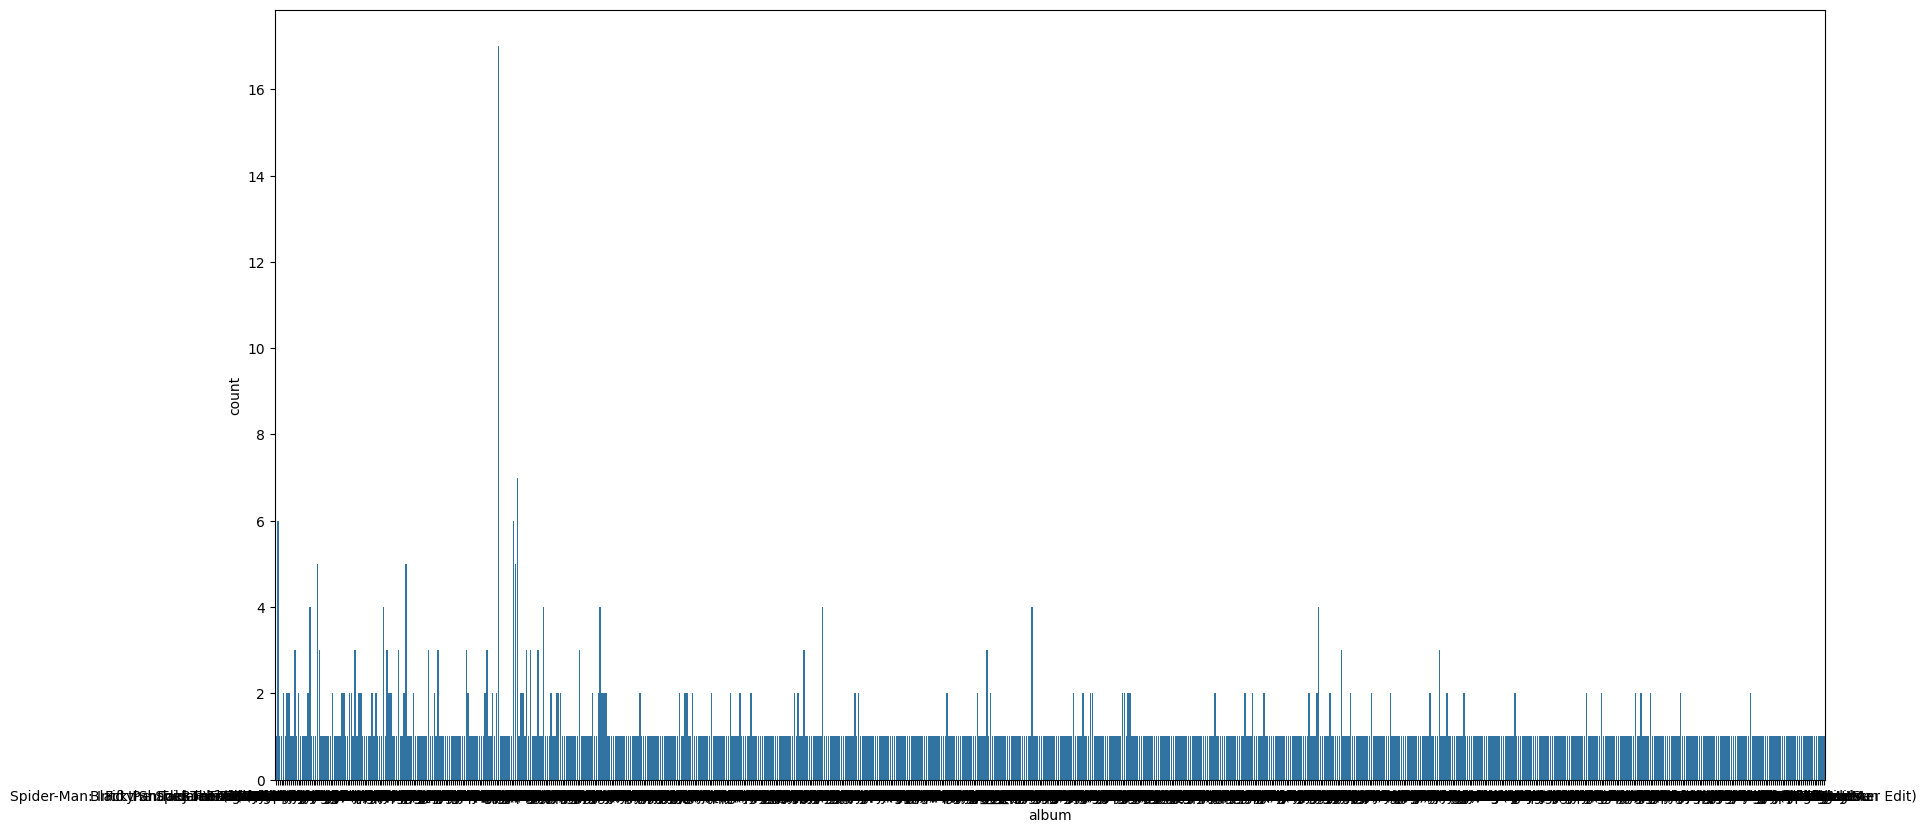

In [38]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'album' , data = data)

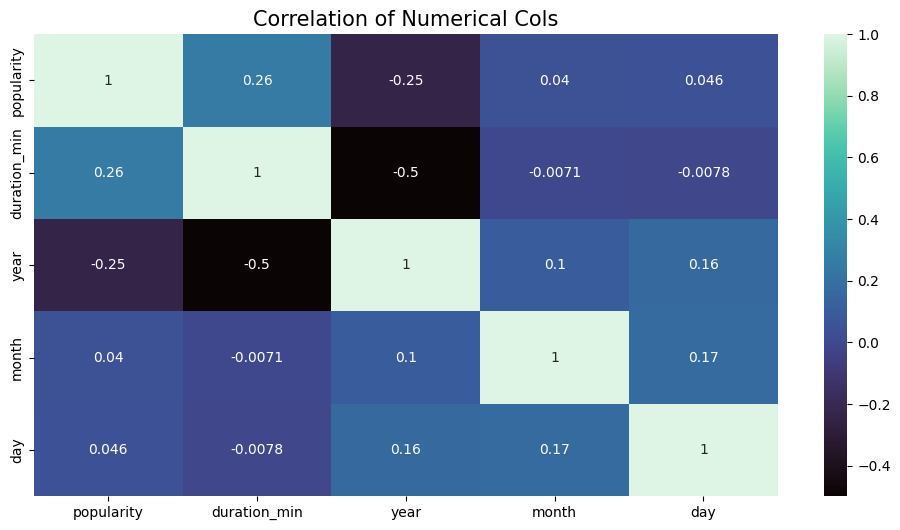

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='mako')
#formation of correlation matrix
#annot = True is used to show the correlation values in the heatmap
#cmap = 'mako' is used to set the color theme of the heatmap
plt.title('Correlation of Numerical Cols',fontsize=15)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
le = LabelEncoder()
encoded_artist = le.fit_transform(data['artist'])
data['encoded_artist'] = encoded_artist


In [44]:
data[['artist' , 'encoded_artist']]

,artist,encoded_artist
0,Kendrick Lamar,255
1,The Weeknd,467
2,Shawn Mendes,426
3,Glass Animals,183
4,DJ Snake,125
...,...,...
995,ISAEV,203
996,Besomorph,70
997,Yohan Gerber,500
998,Arc North,38


In [ ]:
data['encoded_artist'].unique()

array([255, 467, 426, 183, 125, 341, 110, 422, 239, 206, 159, 269, 453,
       379, 292, 421, 162, 282, 450, 225, 251, 148, 364,  72,  48, 316,
       145,  45,  76, 151, 494, 429, 425, 240,  58, 460, 395,  74, 171,
        71, 257,  87, 190, 227,  40, 342, 420, 113, 167,  99, 470, 165,
       288, 444, 130,  53, 155, 134, 411, 293, 108, 503,  59, 283,  20,
       109,  49, 476, 333, 272, 466, 253, 365, 220, 205, 478, 319,  24,
        34,  22,   0,  62,  63, 105, 150, 381, 279, 144,  94, 262,  47,
       507, 317, 233,  31,   2, 177,  17,  96, 458, 491, 323, 229, 304,
       362, 465, 276,  65, 249, 479, 322, 350, 423, 112,  83, 318,  26,
       160, 514, 228,  79, 508, 386, 441, 169, 520, 289, 270,  89,  98,
       287, 348, 263, 406, 396, 375, 389, 363, 104, 219, 505, 127,  28,
       417, 191, 236, 213, 103, 455, 264, 258,  90, 462, 234, 111, 107,
       351, 210, 274, 473, 207, 176, 121, 427,  14, 510, 101, 223,  50,
        37, 374, 132, 416, 294, 175, 401,   1, 463,  36, 438, 33

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler = StandardScaler()
output = scaler.fit_transform(data[['popularity']])
output.mean()

np.float64(8.526512829121202e-17)

In [ ]:
#predictive modellling
#we'll use features 'duration_min' , 'year' to predict the target variable 'popularity'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

new_model = data.dropna(subset=['year'])

x = new_model[['duration_min' , 'year']]
y = new_model['popularity']
#training and testing the model
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

#instantiating the model
lr = LinearRegression()
lr.fit(x_train , y_train)

#predicting the values
y_pred = lr.predict(x_test)

#evaluate the model
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test , y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 758.9349003010647
